<a href="https://colab.research.google.com/github/omemaakhtar/Repo-Bank/blob/main/Image_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check TensorFlow version
import tensorflow as tf
print(tf.__version__)

# Install other necessary libraries
import numpy as np
import matplotlib.pyplot as plt


2.17.0


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match the expected input shape of the pre-trained model
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


In [4]:
from tensorflow.keras import layers, models

# Resize the images to 32x32
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 1)),
    layers.Conv2D(3, (3, 3), padding='same'),  # Convert to 3 channels
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


<ipython-input-4-4dbc3d675bdf>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,272 (9.24 MB)

 Trainable params: 165,288 (645.66 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# Train the model
history = model.fit(x_train_resized, y_train, epochs=5, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.6248 - loss: 1.1969 - val_accuracy: 0.7582 - val_loss: 0.7119
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.7588 - loss: 0.7109 - val_accuracy: 0.7841 - val_loss: 0.6402
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7762 - loss: 0.6559 - val_accuracy: 0.7958 - val_loss: 0.5973
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7946 - loss: 0.6072 - val_accuracy: 0.8089 - val_loss: 0.5679
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8049 - loss: 0.5741 - val_accuracy: 0.8129 - val_loss: 0.5508
313/313 - 6s - 20ms/step - accuracy: 0.8141 - loss: 0.5471

Test accuracy: 0.8141000270843506


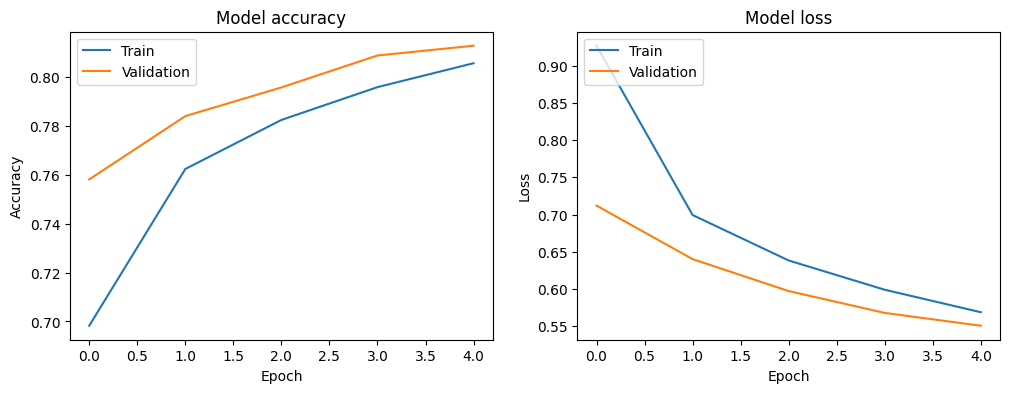

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


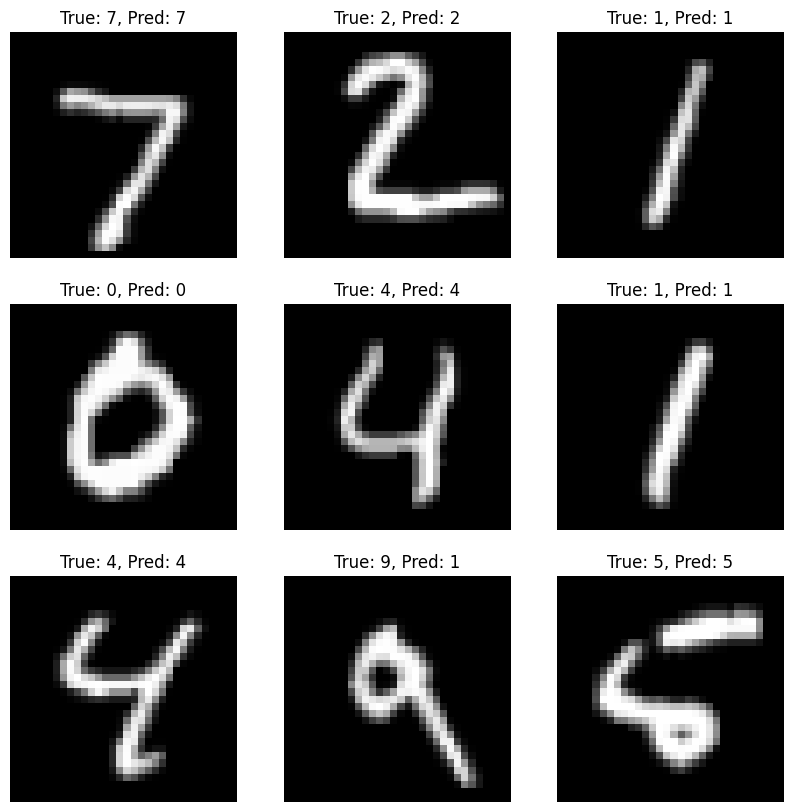

In [9]:
# Display some test images with predicted labels
import numpy as np

# Ensure predictions are numpy arrays
predictions = np.array(predictions)
x_test_resized_np = x_test_resized.numpy()

def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(32, 32), cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_images(x_test_resized_np, y_test, predictions)
